In [119]:
import pandas as pd
import geopandas as gpd
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pprint
import requests
import json
from bs4 import BeautifulSoup
import plotly.express as px
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
import datetime as dt
from scipy import sparse
import plotly.graph_objects as go

In [3]:
file = './data/loneliness/England/msoa_loneliness.shp'
msoa_map = gpd.read_file(file)
msoa_map.head()

objectid   msoa11cd                  msoa11nm                 msoa11nmw  \
0         1  E02000001        City of London 001        City of London 001   
1         2  E02000002  Barking and Dagenham 001  Barking and Dagenham 001   
2         3  E02000003  Barking and Dagenham 002  Barking and Dagenham 002   
3         4  E02000004  Barking and Dagenham 003  Barking and Dagenham 003   
4         5  E02000005  Barking and Dagenham 004  Barking and Dagenham 004   

     st_areasha   st_lengths  loneills_2 loneills_1  \
0  2.983633e+06  8017.914674    0.610642    #f5f5f5   
1  2.091907e+06  7086.028359   -0.155306    #f5f5f5   
2  2.122216e+06  7405.118745    0.326728    #f5f5f5   
3  2.569470e+06  7148.814421    0.324374    #f5f5f5   
4  1.111109e+06  5491.227647    0.334801    #f5f5f5   

                                            geometry  
0  POLYGON ((532419.592 181998.305, 532746.814 18...  
1  POLYGON ((548452.001 189024.718, 548235.426 18...  
2  POLYGON ((548954.500 189063.203, 548874.188 18...  
3  POLYGON ((551943.813 186027.672, 551670.812 18...  
4  POLYGON ((549145.624 187383.875, 549128.657 18...

In [4]:
msoa_map['loneills_1'] = msoa_map['loneills_1'].replace(['nan'], '#ffffff')
msoa_map['loneills_2'] = msoa_map['loneills_2'].astype(float)

<AxesSubplot:>

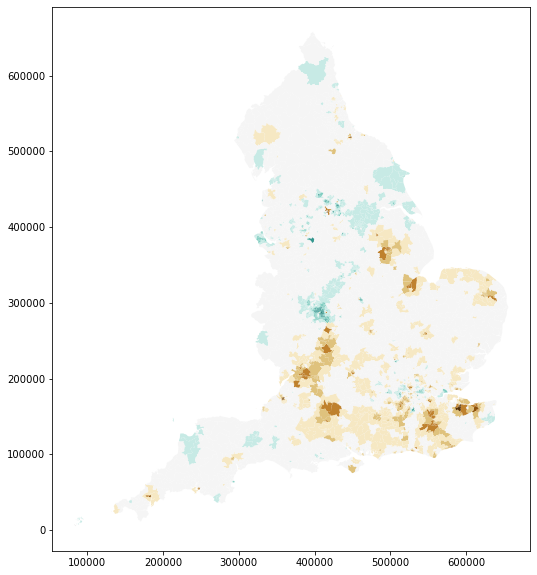

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_map.plot(ax=ax,color=[c for c in msoa_map['loneills_1']], legend=True)

In [5]:
regions = msoa_map['msoa11nm']
new_regions = []
for region in regions:
    new_regions.append(region[:-4])
new_regions = pd.Series(new_regions)

### Rainfall

In [6]:
url = 'https://www.freeflush.co.uk/blogs/freeflush-rainwater-harvesting-blog/30077441-which-is-the-rainiest-city-in-the-uk'
req = requests.get(url)
source = req.text
soup = BeautifulSoup(source, 'html.parser')

In [7]:
table_df = pd.DataFrame(columns=['City', 'Rainfall'])
table = soup.find('table', attrs={
    'class': 'tablesorter'
})
table_body = table.find('tbody')
rows = table_body.find_all('tr')
for row in rows:
    columns = row.find_all('td')
    
    if(columns != []):
        city = columns[0].text.strip()
        rainfall = columns[1].text.strip()
        
        table_df = table_df.append({'City':city, 'Rainfall':rainfall}, ignore_index=True)
    
table_df

City Rainfall
0      Glasgow     1124
1     St David     1138
2      Cardiff     1152
3        Newry     1019
4       Bangor     1100
..         ...      ...
58  Chelmsford      592
59       Derry      571
60         Ely      574
61   Cambridge      568
62      London      557

[63 rows x 2 columns]

Reafing England shape file

In [12]:
england_shape = './data/england_cities/Major_Towns_and_Cities_(December_2015)_Boundaries_V2.shp'
england_cities = gpd.read_file(england_shape)
england_cities = england_cities.rename(columns={'TCITY15NM' :'City'})
england_cities.head()

OBJECTID  TCITY15CD         City   BNG_E   BNG_N      LONG       LAT  \
0         1  J01000001     Barnsley  436375  407875 -1.452250  53.56625   
1         2  J01000002     Basildon  572525  189350  0.488409  51.57661   
2         3  J01000003  Basingstoke  463725  152600 -1.087930  51.26899   
3         4  J01000004         Bath  374800  164325 -2.363450  51.37741   
4         5  J01000005      Bedford  505925  250450 -0.453520  52.14220   

     Shape__Are     Shape__Len  \
0  2.568247e+07  115099.860000   
1  2.551499e+07  119299.838000   
2  2.918502e+07   93900.388003   
3  2.423750e+07   92099.940000   
4  2.016749e+07   71300.186000   

                                            geometry  
0  POLYGON ((432250.004 411199.994, 432300.002 41...  
1  MULTIPOLYGON (((567100.007 191450.007, 567100....  
2  POLYGON ((466600.000 155200.004, 466550.002 15...  
3  MULTIPOLYGON (((373799.999 167549.999, 373750....  
4  MULTIPOLYGON (((505300.000 247500.003, 505250....

<AxesSubplot:>

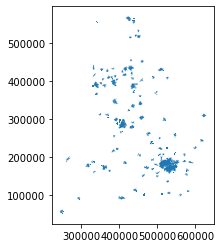

In [13]:
england_cities.plot()

In [14]:
england_file = './data/shape_england/RGN_DEC_2021_EN_BFC.shp'
england_map = gpd.read_file(england_file)

<AxesSubplot:>

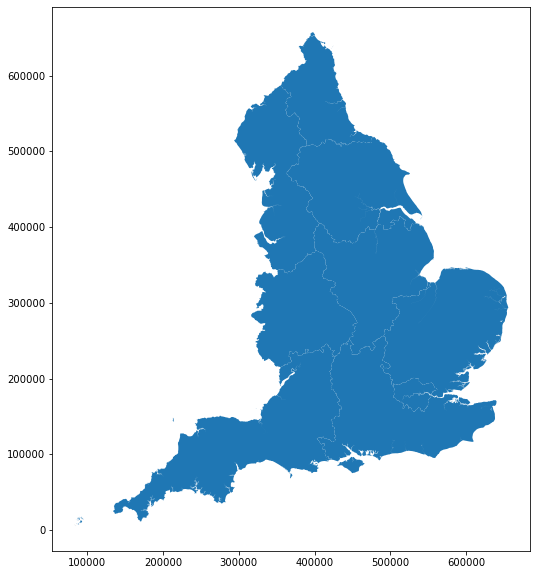

In [15]:
fig, ax = plt.subplots(figsize=(10,10))

england_map.plot(ax=ax)

In [16]:
data = pd.merge(england_cities, table_df, on='City')
data.head(10)

OBJECTID  TCITY15CD        City   BNG_E   BNG_N      LONG       LAT  \
0         4  J01000004        Bath  374800  164325 -2.363450  51.37741   
1         7  J01000007  Birmingham  408850  286925 -1.871110  52.48019   
2        13  J01000013    Bradford  415525  431875 -1.765870  53.78298   
3        15  J01000015     Bristol  362050  173400 -2.547600  51.45829   
4        19  J01000019   Cambridge  546350  258525  0.140303  52.20553   
5        20  J01000020     Cardiff  316675  180875 -3.202350  51.52062   
6        23  J01000023  Chelmsford  571625  207025  0.484100  51.73566   
7        25  J01000025     Chester  340350  367350 -2.894400  53.19988   
8        28  J01000028    Coventry  432700  279725 -1.520650  52.41456   
9        31  J01000031       Derby  434575  334975 -1.487310  52.91111   

     Shape__Are     Shape__Len  \
0  2.423750e+07   92099.940000   
1  2.291349e+08  271100.218100   
2  7.000252e+07  188999.530808   
3  1.124600e+08  232400.114004   
4  3.762498e+07  126299.986000   
5  7.138014e+07  204900.196010   
6  2.570749e+07   91000.026000   
7  2.361748e+07   82900.062000   
8  7.357742e+07  238100.008000   
9  5.869997e+07  169700.108000   

                                            geometry Rainfall  
0  MULTIPOLYGON (((373799.999 167549.999, 373750....      814  
1  MULTIPOLYGON (((407750.003 276999.999, 407750....      805  
2  MULTIPOLYGON (((414950.003 426099.999, 414899....     1024  
3  MULTIPOLYGON (((354150.007 177549.996, 354150....      802  
4  MULTIPOLYGON (((542999.998 260349.995, 543049....      568  
5  MULTIPOLYGON (((317249.986 177150.001, 317199....     1152  
6  MULTIPOLYGON (((573400.000 204799.996, 573400....      592  
7  MULTIPOLYGON (((339900.002 367699.996, 339950....      726  
8  MULTIPOLYGON (((436249.997 283800.002, 436249....      700  
9  MULTIPOLYGON (((430250.000 333800.000, 430250....      709

In [17]:
data.tail()

OBJECTID  TCITY15CD        City   BNG_E   BNG_N     LONG       LAT  \
32        96  J01000096  Sunderland  438625  554950 -1.39942  54.88781   
33        98  J01000098     Swansea  264875  194825 -3.95394  51.63595   
34       101  J01000101   Wakefield  432575  421550 -1.50820  53.68940   
35       110  J01000110   Worcester  386575  255800 -2.19784  52.20027   
36       112  J01000112        York  460225  452150 -1.08357  53.96195   

      Shape__Are     Shape__Len  \
32  3.913749e+07  135299.846000   
33  4.907997e+07  190900.018000   
34  2.926752e+07  122899.966000   
35  2.423248e+07   89800.048000   
36  3.369751e+07  114599.972002   

                                             geometry Rainfall  
32  MULTIPOLYGON (((440949.986 555499.999, 440899....      597  
33  MULTIPOLYGON (((266700.003 195300.005, 266700....      999  
34  MULTIPOLYGON (((431149.997 416999.994, 431200....      603  
35  MULTIPOLYGON (((384900.003 254499.999, 384900....      606  
36  POLYGON ((458849.998 452949.994, 458849.998 45...      626

In [18]:
data['Rainfall'].isna().sum()
data['Rainfall'] = data['Rainfall'].astype(float)

<AxesSubplot:>

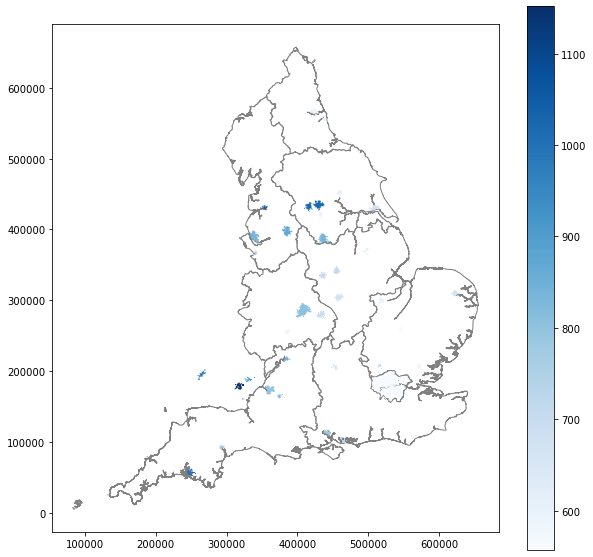

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
england_map.plot(color='white', edgecolor="grey", ax=ax)
data.plot(column='Rainfall', ax=ax, cmap='Blues',legend=True)

In [20]:
new_regions = pd.concat([new_regions,msoa_map['loneills_2']],axis=1)
new_regions = new_regions.rename(columns={0 :'City'})
new_regions

City  loneills_2
0           City of London    0.610642
1     Barking and Dagenham   -0.155306
2     Barking and Dagenham    0.326728
3     Barking and Dagenham    0.324374
4     Barking and Dagenham    0.334801
...                    ...         ...
6786             Greenwich    0.800393
6787             Greenwich    0.457012
6788             Liverpool    0.187870
6789             Liverpool   -0.659809
6790             Liverpool    0.312844

[6791 rows x 2 columns]

In [21]:
rain_loneliness = pd.merge(new_regions, table_df, on='City')
rain_loneliness.tail(50)

City  loneills_2 Rainfall
1151    Norwich    1.616667      674
1152    Norwich    1.575318      674
1153    Norwich    1.234677      674
1154    Norwich    1.907026      674
1155    Norwich    2.578225      674
1156    Norwich    2.706488      674
1157     Oxford    2.372186      660
1158     Oxford    2.172818      660
1159     Oxford    2.637424      660
1160     Oxford    2.054711      660
1161     Oxford    0.571567      660
1162     Oxford    0.870360      660
1163     Oxford    0.499473      660
1164     Oxford    3.397373      660
1165     Oxford    3.188237      660
1166     Oxford    0.397196      660
1167     Oxford    0.796244      660
1168     Oxford   -0.049641      660
1169     Oxford    0.138886      660
1170     Oxford   -0.093564      660
1171     Oxford   -0.317826      660
1172     Oxford   -0.210476      660
1173     Oxford    0.211181      660
1174     Oxford    0.274549      660
1175  Lichfield   -0.174803      681
1176  Lichfield   -1.251921      681
1177  Lichfield   -0.743313      681
1178  Lichfield   -1.071600      681
1179  Lichfield   -1.123420      681
1180  Lichfield   -0.890139      681
1181  Lichfield   -1.104805      681
1182  Lichfield   -1.022206      681
1183  Lichfield   -1.055014      681
1184  Lichfield   -1.261366      681
1185  Lichfield   -1.315206      681
1186  Lichfield   -1.311640      681
1187  Worcester    1.287269      606
1188  Worcester    1.043104      606
1189  Worcester    1.018192      606
1190  Worcester    1.289711      606
1191  Worcester    1.001301      606
1192  Worcester    0.943970      606
1193  Worcester    1.608284      606
1194  Worcester    0.978292      606
1195  Worcester    0.085163      606
1196  Worcester    0.899039      606
1197  Worcester   -0.023797      606
1198  Worcester    0.340093      606
1199  Worcester    0.620667      606
1200  Worcester    0.758371      606

In [22]:
print (rain_loneliness.dtypes)

City           object
loneills_2    float64
Rainfall       object
dtype: object


In [23]:
rain_loneliness['Rainfall'] = rain_loneliness['Rainfall'].astype(float)
print (rain_loneliness.dtypes)

City           object
loneills_2    float64
Rainfall      float64
dtype: object


In [24]:
rain_loneliness=rain_loneliness.groupby('City').mean()
rain_loneliness.corr()

loneills_2  Rainfall
loneills_2    1.000000 -0.325579
Rainfall     -0.325579  1.000000

In [25]:
rain_loneliness.columns

Index(['loneills_2', 'Rainfall'], dtype='object')

In [26]:
rain_loneliness['City'] = rain_loneliness.index
rain_loneliness.columns

Index(['loneills_2', 'Rainfall', 'City'], dtype='object')

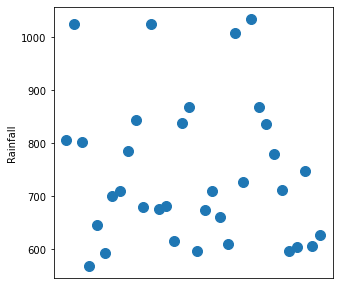

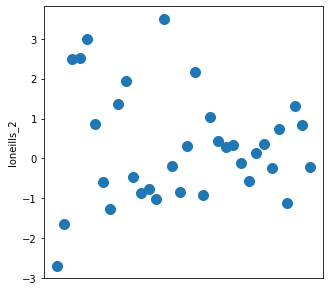

In [27]:
fig1, ax1 = plt.subplots(figsize=(5,5))
fig2, ax2 = plt.subplots(figsize=(5,5))
ax1.axes.xaxis.set_visible(False)
ax2.axes.xaxis.set_visible(False)
rain_loneliness.plot.scatter(x = 'City', y = 'Rainfall', s = 100, ax=ax1);
rain_loneliness.plot.scatter(x = 'City', y = 'loneills_2', s = 100, ax=ax2);

### Temperature

Reading minimum temperature data for uk (dataset from met office)

In [77]:
fn = 'data/metoffice/tasmin_hadukgrid_uk_1km_ann_201801-201812.nc'
ds = nc.Dataset(fn)

In [78]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    comment: annual resolution gridded climate observations
    creation_date: 2021-07-12T19:50:50
    frequency: ann
    institution: Met Office
    references: doi: 10.1002/joc.1161
    short_name: annual_mintemp
    source: HadUK-Grid_v1.0.3.0
    title: Gridded surface climate observations data for the UK
    version: v20210712
    Conventions: CF-1.7
    dimensions(sizes): time(1), projection_y_coordinate(1450), projection_x_coordinate(900), bnds(2)
    variables(dimensions): float64 tasmin(time, projection_y_coordinate, projection_x_coordinate), int32 transverse_mercator(), float64 time(time), float64 time_bnds(time, bnds), float64 projection_y_coordinate(projection_y_coordinate), float64 projection_y_coordinate_bnds(projection_y_coordinate, bnds), float64 projection_x_coordinate(projection_x_coordinate), float64 projection_x_coordinate_bnds(projection_x_coordinate, bnds), float64 latitude(proje

In [79]:
ds.__dict__

{'comment': 'annual resolution gridded climate observations',
 'creation_date': '2021-07-12T19:50:50',
 'frequency': 'ann',
 'institution': 'Met Office',
 'references': 'doi: 10.1002/joc.1161',
 'short_name': 'annual_mintemp',
 'source': 'HadUK-Grid_v1.0.3.0',
 'title': 'Gridded surface climate observations data for the UK',
 'version': 'v20210712',
 'Conventions': 'CF-1.7'}

In [80]:
ds.variables

{'tasmin': <class 'netCDF4._netCDF4.Variable'>
 float64 tasmin(time, projection_y_coordinate, projection_x_coordinate)
     _FillValue: 1e+20
     standard_name: air_temperature
     long_name: Minimum air temperature
     units: degC
     description: Minimum air temperature
     label_units: C
     level: 1.5m
     plot_label: Minimum air temperature at 1.5m (C)
     cell_methods: time: minimum within days time: mean over days time: mean
     grid_mapping: transverse_mercator
     coordinates: latitude longitude
 unlimited dimensions: 
 current shape = (1, 1450, 900)
 filling on,
 'transverse_mercator': <class 'netCDF4._netCDF4.Variable'>
 int32 transverse_mercator()
     grid_mapping_name: transverse_mercator
     longitude_of_prime_meridian: 0.0
     semi_major_axis: 6377563.396
     semi_minor_axis: 6356256.909
     longitude_of_central_meridian: -2.0
     latitude_of_projection_origin: 49.0
     false_easting: 400000.0
     false_northing: -100000.0
     scale_factor_at_central_m

In [81]:
variables = ds.variables.keys()
variables

dict_keys(['tasmin', 'transverse_mercator', 'time', 'time_bnds', 'projection_y_coordinate', 'projection_y_coordinate_bnds', 'projection_x_coordinate', 'projection_x_coordinate_bnds', 'latitude', 'longitude'])

In [82]:
min_temp = ds['tasmin'][:]
min_temp

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]]],
  mask=[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]]],
  fill_value=1e+20)

In [83]:
min_temp.mean()

5.711054820191446

In [84]:
min_temp.data

array([[[1.e+20, 1.e+20, 1.e+20, ..., 1.e+20, 1.e+20, 1.e+20],
        [1.e+20, 1.e+20, 1.e+20, ..., 1.e+20, 1.e+20, 1.e+20],
        [1.e+20, 1.e+20, 1.e+20, ..., 1.e+20, 1.e+20, 1.e+20],
        ...,
        [1.e+20, 1.e+20, 1.e+20, ..., 1.e+20, 1.e+20, 1.e+20],
        [1.e+20, 1.e+20, 1.e+20, ..., 1.e+20, 1.e+20, 1.e+20],
        [1.e+20, 1.e+20, 1.e+20, ..., 1.e+20, 1.e+20, 1.e+20]]])

In [85]:
min_temp_data = min_temp[min_temp.mask == False].data
min_temp_data

array([10.32674306, 10.34782211, 10.44893399, ...,  5.29907023,
        5.69415881,  5.89742092])

In [86]:
ds['tasmin']

<class 'netCDF4._netCDF4.Variable'>
float64 tasmin(time, projection_y_coordinate, projection_x_coordinate)
    _FillValue: 1e+20
    standard_name: air_temperature
    long_name: Minimum air temperature
    units: degC
    description: Minimum air temperature
    label_units: C
    level: 1.5m
    plot_label: Minimum air temperature at 1.5m (C)
    cell_methods: time: minimum within days time: mean over days time: mean
    grid_mapping: transverse_mercator
    coordinates: latitude longitude
unlimited dimensions: 
current shape = (1, 1450, 900)
filling on

In [89]:
time = ds.variables['time'][:]
lats = ds.variables['latitude'][:]
lons = ds.variables['longitude'][:]
min_temp_units = ds.variables['tasmin'].units

In [107]:
m = Basemap(llcrnrlon=-7.5600,llcrnrlat=49.7600,
            urcrnrlon=2.7800,urcrnrlat=60.840,
            resolution='i',
            projection='tmerc',
            lon_0=-4.36,lat_0=54.7,
            epsg=27700)

In [108]:
x, y = m(lons, lats)

<ipython-input-116-0aef5af3f638>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = m.pcolor(x,y,np.squeeze(min_temp))


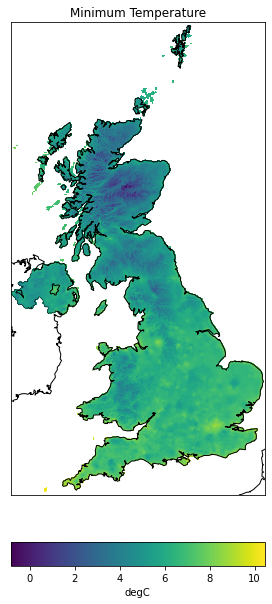

In [116]:
# fig, ax = plt.subplots(figsize=(10,10))

# cs = m.pcolor(x,y,np.squeeze(min_temp))
# m.drawmapboundary(fill_color='#46bcec')
# m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# m.drawcoastlines()
# m.drawrivers()
# cbar = m.colorbar(cs, location='bottom', pad="10%")
# cbar.set_label(min_temp_units)
# plt.title('Minimum Temperature')
# plt.show()

# Plot Data
fig, ax = plt.subplots(figsize=(10,10))
cs = m.pcolor(x,y,np.squeeze(min_temp))

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(min_temp_units)

# Add Title
plt.title('Minimum Temperature')

plt.show()

In [64]:
time

masked_array(data=[1915332.],
             mask=False,
       fill_value=1e+20)

In [130]:
min_temp.compressed()

array([10.32674306, 10.34782211, 10.44893399, ...,  5.29907023,
        5.69415881,  5.89742092])

In [131]:
import xarray as xr

ds = xr.open_dataset('data/metoffice/tasmin_hadukgrid_uk_1km_ann_201801-201812.nc')
df = ds.to_dataframe()

https://www.worldweatheronline.com/united-kingdom-weather.aspx

In [63]:
rainfall = pd.read_excel('./data/weather_by_region/rainfall.xls')
rainfall = rainfall[['New LA Code', 'Average Rainfall (June, mm)']]
rainfall.head()

New LA Code  Average Rainfall (June, mm)
0   E09000001                        101.4
1   E09000007                         72.4
2   E09000011                         83.1
3   E09000012                        101.4
4   E09000013                         93.0

In [64]:
master_df = pd.read_csv('../master_df.csv')
print(master_df.shape)
master_df.head()

(83, 29)


Unnamed: 0    LA code  Ofsted Avg  lonely_avg  KS2 metrics PCA  \
0           0  E06000003    2.791667    0.649266    -18159.719122   
1           1  E06000004    3.085714    0.635474    -11390.336475   
2           2  E06000005    2.894737    0.967079    -22128.626436   
3           3  E06000007    3.189873    0.119804    -12615.781889   
4           4  E06000008    2.935065   -0.654742    -15969.891271   

   GDHI income index                LA name  LA flow rate     All Ages  \
0               76.2   Redcar and Cleveland      0.006576  7222.526316   
1               79.3       Stockton-on-Tees      0.006511  8225.791667   
2               82.8             Darlington      0.007179  7160.133333   
3               98.5             Warrington      0.005035  8375.880000   
4               67.3  Blackburn with Darwen      0.007943  8335.000000   

        meds  ...  No Offer %S  Offer in diff LA code %S  FSM Eligible %  \
0  44.315926  ...     0.135227                  1.928191       17.971133   
1  41.914379  ...     0.500000                  2.574526       16.438313   
2  42.795048  ...     0.000000                  1.426025       16.558996   
3  43.224052  ...     0.043085                  2.835379       10.993291   
4  37.211131  ...     0.000000                  7.403599       15.195916   

   <2 A levels   < AAB  perm_excl_rate  Unsuccessful Appeals  \
0       23.263  86.907       26.902558                  58.2   
1       22.014  81.560       12.734798                  71.0   
2       23.524  82.458        6.176271                  71.2   
3       39.531  87.766        2.481928                  76.1   
4       20.973  89.454        3.346471                  86.7   

   % of ppl not doing degrees  progression_rate  total_pop  
0                        23.0          0.374421     7550.0  
1                        22.7          0.427333    10385.0  
2                        35.8          0.390533     5635.0  
3                        47.8          0.445360    11660.0  
4                        35.4          0.465333     8990.0  

[5 rows x 29 columns]

In [65]:
la_codes = pd.read_csv('../school ranking and income\SchoolRankingIncome.csv')['LA code']
print(la_codes.values)

['E06000003' 'E06000004' 'E06000005' 'E06000007' 'E06000008' 'E06000009'
 'E06000010' 'E06000011' 'E06000013' 'E06000014' 'E06000015' 'E06000016'
 'E06000018' 'E06000019' 'E06000020' 'E06000021' 'E06000023' 'E06000025'
 'E06000026' 'E06000027' 'E06000030' 'E06000031' 'E06000032' 'E06000033'
 'E06000034' 'E06000035' 'E06000041' 'E06000042' 'E06000043' 'E06000044'
 'E06000045' 'E06000046' 'E06000047' 'E06000049' 'E06000050' 'E06000051'
 'E06000054' 'E06000055' 'E06000056' 'E06000058' 'E06000059' 'E08000003'
 'E08000005' 'E08000008' 'E08000009' 'E08000010' 'E08000012' 'E08000013'
 'E08000014' 'E08000015' 'E08000018' 'E08000019' 'E08000024' 'E08000025'
 'E08000026' 'E08000027' 'E08000028' 'E08000029' 'E08000030' 'E08000031'
 'E08000032' 'E08000034' 'E08000035' 'E08000036' 'E09000003' 'E09000005'
 'E09000006' 'E09000007' 'E09000008' 'E09000009' 'E09000010' 'E09000011'
 'E09000016' 'E09000017' 'E09000019' 'E09000020' 'E09000022' 'E09000025'
 'E09000027' 'E09000028' 'E09000029' 'E09000030' 'E

In [66]:
rainfall = rainfall[rainfall['New LA Code'].isin(la_codes.values)]
rainfall.shape

(83, 2)

In [70]:
rainfall = rainfall.rename(columns={"New LA Code": "LA code"})

In [71]:
master_df = master_df.merge(rainfall, how='inner', left_on='LA code', right_on='LA code')
print(master_df.shape)
master_df.head()

(83, 30)


Unnamed: 0    LA code  Ofsted Avg  lonely_avg  KS2 metrics PCA  \
0           0  E06000003    2.791667    0.649266    -18159.719122   
1           1  E06000004    3.085714    0.635474    -11390.336475   
2           2  E06000005    2.894737    0.967079    -22128.626436   
3           3  E06000007    3.189873    0.119804    -12615.781889   
4           4  E06000008    2.935065   -0.654742    -15969.891271   

   GDHI income index                LA name  LA flow rate     All Ages  \
0               76.2   Redcar and Cleveland      0.006576  7222.526316   
1               79.3       Stockton-on-Tees      0.006511  8225.791667   
2               82.8             Darlington      0.007179  7160.133333   
3               98.5             Warrington      0.005035  8375.880000   
4               67.3  Blackburn with Darwen      0.007943  8335.000000   

        meds  ...  Offer in diff LA code %S  FSM Eligible %  <2 A levels  \
0  44.315926  ...                  1.928191       17.971133       23.263   
1  41.914379  ...                  2.574526       16.438313       22.014   
2  42.795048  ...                  1.426025       16.558996       23.524   
3  43.224052  ...                  2.835379       10.993291       39.531   
4  37.211131  ...                  7.403599       15.195916       20.973   

    < AAB  perm_excl_rate  Unsuccessful Appeals  % of ppl not doing degrees  \
0  86.907       26.902558                  58.2                        23.0   
1  81.560       12.734798                  71.0                        22.7   
2  82.458        6.176271                  71.2                        35.8   
3  87.766        2.481928                  76.1                        47.8   
4  89.454        3.346471                  86.7                        35.4   

   progression_rate  total_pop  Average Rainfall (June, mm)  
0          0.374421     7550.0                         89.0  
1          0.427333    10385.0                         66.6  
2          0.390533     5635.0                         71.2  
3          0.445360    11660.0                         50.7  
4          0.465333     8990.0                        102.2  

[5 rows x 30 columns]

In [72]:
rainfall.to_csv('./data/rainfall.csv')

In [76]:
la_map = gpd.read_file('../maps/LAD_MAY_2021_UK_BFE_V2.shp')
la_map.head()

OBJECTID    LAD21CD               LAD21NM   BNG_E   BNG_N     LONG  \
0         1  E06000001            Hartlepool  447160  531474 -1.27018   
1         2  E06000002         Middlesbrough  451141  516887 -1.21099   
2         3  E06000003  Redcar and Cleveland  464361  519597 -1.00608   
3         4  E06000004      Stockton-on-Tees  444940  518183 -1.30664   
4         5  E06000005            Darlington  428029  515648 -1.56835   

         LAT     SHAPE_Leng    SHAPE_Area  \
0  54.676140   66110.011028  9.835107e+07   
1  54.544670   41055.789790  5.455359e+07   
2  54.567520  105292.103526  2.537854e+08   
3  54.556911  108085.190140  2.097308e+08   
4  54.535339  107203.152334  1.974778e+08   

                                            geometry  
0  POLYGON ((447213.900 537036.104, 447228.798 53...  
1  POLYGON ((448489.897 522071.798, 448592.597 52...  
2  POLYGON ((455525.931 528406.654, 455724.632 52...  
3  POLYGON ((444157.002 527956.304, 444165.898 52...  
4  POLYGON ((423496.602 524724.299, 423497.204 52...

In [77]:
la_map = la_map[la_map['LAD21CD'].isin(la_codes.values)]
la_map.head()

OBJECTID    LAD21CD                LAD21NM   BNG_E   BNG_N     LONG  \
2         3  E06000003   Redcar and Cleveland  464361  519597 -1.00608   
3         4  E06000004       Stockton-on-Tees  444940  518183 -1.30664   
4         5  E06000005             Darlington  428029  515648 -1.56835   
6         7  E06000007             Warrington  362744  388456 -2.56167   
7         8  E06000008  Blackburn with Darwen  369490  422806 -2.46360   

         LAT     SHAPE_Leng    SHAPE_Area  \
2  54.567520  105292.103526  2.537854e+08   
3  54.556911  108085.190140  2.097308e+08   
4  54.535339  107203.152334  1.974778e+08   
6  53.391628   84154.547834  1.823836e+08   
7  53.700802   65284.952318  1.370221e+08   

                                            geometry  
2  POLYGON ((455525.931 528406.654, 455724.632 52...  
3  POLYGON ((444157.002 527956.304, 444165.898 52...  
4  POLYGON ((423496.602 524724.299, 423497.204 52...  
6  POLYGON ((367308.201 398265.497, 367315.399 39...  
7  POLYGON ((369226.299 431801.198, 369234.000 43...

In [81]:
la_map = pd.read_csv('./data/la_england/Local_Authority_Districts_(December_2017)_Boundaries_in_Great_Britain.csv')
print(la_map.shape)
la_map.head()

(380, 10)


objectid    lad17cd               lad17nm lad17nmw   bng_e   bng_n  \
0         1  E06000001            Hartlepool           447157  531476   
1         2  E06000002         Middlesbrough           451141  516887   
2         3  E06000003  Redcar and Cleveland           464359  519597   
3         4  E06000004      Stockton-on-Tees           444937  518183   
4         5  E06000005            Darlington           428029  515649   

      long        lat  st_areashape  st_lengthshape  
0 -1.27023  54.676159  9.355951e+07    71707.407523  
1 -1.21099  54.544670  5.388858e+07    43840.866561  
2 -1.00611  54.567520  2.448203e+08    97993.391012  
3 -1.30669  54.556911  2.049622e+08   119581.595543  
4 -1.56835  54.535351  1.974757e+08   107206.401694

In [84]:
la_map = la_map[la_map['lad17cd'].isin(la_codes.values)]
print(la_map.shape)
la_map.head()

(83, 10)


objectid    lad17cd                lad17nm lad17nmw   bng_e   bng_n  \
2         3  E06000003   Redcar and Cleveland           464359  519597   
3         4  E06000004       Stockton-on-Tees           444937  518183   
4         5  E06000005             Darlington           428029  515649   
6         7  E06000007             Warrington           362744  388456   
7         8  E06000008  Blackburn with Darwen           369490  422806   

      long        lat  st_areashape  st_lengthshape  
2 -1.00611  54.567520  2.448203e+08    97993.391012  
3 -1.30669  54.556911  2.049622e+08   119581.595543  
4 -1.56835  54.535351  1.974757e+08   107206.401694  
6 -2.56167  53.391628  1.806280e+08   114690.891220  
7 -2.46360  53.700802  1.370221e+08    65284.992754

In [89]:
rainfall_map = la_map.merge(rainfall, how='inner', left_on='lad17cd', right_on='LA code').drop('LA code', 1)
rainfall_map.head()

objectid    lad17cd                lad17nm lad17nmw   bng_e   bng_n  \
0         3  E06000003   Redcar and Cleveland           464359  519597   
1         4  E06000004       Stockton-on-Tees           444937  518183   
2         5  E06000005             Darlington           428029  515649   
3         7  E06000007             Warrington           362744  388456   
4         8  E06000008  Blackburn with Darwen           369490  422806   

      long        lat  st_areashape  st_lengthshape  \
0 -1.00611  54.567520  2.448203e+08    97993.391012   
1 -1.30669  54.556911  2.049622e+08   119581.595543   
2 -1.56835  54.535351  1.974757e+08   107206.401694   
3 -2.56167  53.391628  1.806280e+08   114690.891220   
4 -2.46360  53.700802  1.370221e+08    65284.992754   

   Average Rainfall (June, mm)  
0                         89.0  
1                         66.6  
2                         71.2  
3                         50.7  
4                        102.2

In [117]:
fig = px.(rainfall_map,lat='lat',lon='long', hover_name="Average Rainfall (June, mm)")
fig.update_layout(title = 'Significant Earthquakes, 1965-2016', title_x=0.5)
fig.show()

In [124]:
la_map = gpd.read_file('./data/la_england/LAD_MAY_2021_UK_BFE_V2.shp')
la_map.head()

OBJECTID    LAD21CD               LAD21NM   BNG_E   BNG_N     LONG  \
0         1  E06000001            Hartlepool  447160  531474 -1.27018   
1         2  E06000002         Middlesbrough  451141  516887 -1.21099   
2         3  E06000003  Redcar and Cleveland  464361  519597 -1.00608   
3         4  E06000004      Stockton-on-Tees  444940  518183 -1.30664   
4         5  E06000005            Darlington  428029  515648 -1.56835   

         LAT     SHAPE_Leng    SHAPE_Area  \
0  54.676140   66110.011028  9.835107e+07   
1  54.544670   41055.789790  5.455359e+07   
2  54.567520  105292.103526  2.537854e+08   
3  54.556911  108085.190140  2.097308e+08   
4  54.535339  107203.152334  1.974778e+08   

                                            geometry  
0  POLYGON ((447213.900 537036.104, 447228.798 53...  
1  POLYGON ((448489.897 522071.798, 448592.597 52...  
2  POLYGON ((455525.931 528406.654, 455724.632 52...  
3  POLYGON ((444157.002 527956.304, 444165.898 52...  
4  POLYGON ((423496.602 524724.299, 423497.204 52...

In [128]:
rainfall_map = la_map.merge(rainfall, how='inner', left_on='LAD21CD', right_on='LA code').drop('LA code', 1)
print(rainfall_map.shape)
rainfall_map.head()

(83, 11)


OBJECTID    LAD21CD                LAD21NM   BNG_E   BNG_N     LONG  \
0         3  E06000003   Redcar and Cleveland  464361  519597 -1.00608   
1         4  E06000004       Stockton-on-Tees  444940  518183 -1.30664   
2         5  E06000005             Darlington  428029  515648 -1.56835   
3         7  E06000007             Warrington  362744  388456 -2.56167   
4         8  E06000008  Blackburn with Darwen  369490  422806 -2.46360   

         LAT     SHAPE_Leng    SHAPE_Area  \
0  54.567520  105292.103526  2.537854e+08   
1  54.556911  108085.190140  2.097308e+08   
2  54.535339  107203.152334  1.974778e+08   
3  53.391628   84154.547834  1.823836e+08   
4  53.700802   65284.952318  1.370221e+08   

                                            geometry  \
0  POLYGON ((455525.931 528406.654, 455724.632 52...   
1  POLYGON ((444157.002 527956.304, 444165.898 52...   
2  POLYGON ((423496.602 524724.299, 423497.204 52...   
3  POLYGON ((367308.201 398265.497, 367315.399 39...   
4  POLYGON ((369226.299 431801.198, 369234.000 43...   

   Average Rainfall (June, mm)  
0                         89.0  
1                         66.6  
2                         71.2  
3                         50.7  
4                        102.2

In [141]:
la_map = la_map[la_map['LAD21CD'].str.startswith('E')]

<AxesSubplot:>

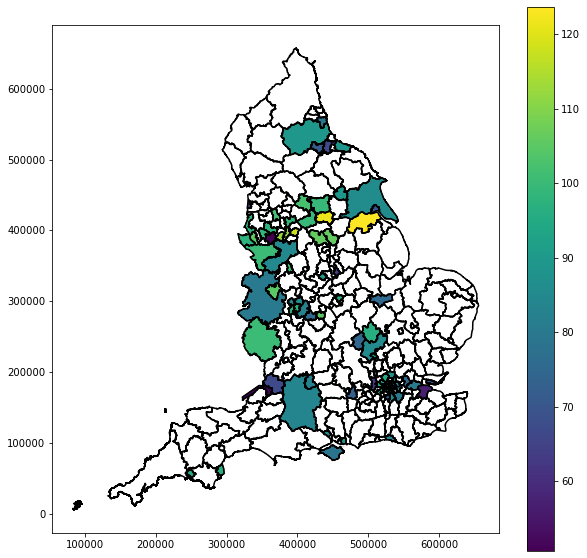

In [148]:
fig, ax = plt.subplots(figsize=(10,10))
la_map.boundary.plot(ax=ax,edgecolor="black");
rainfall_map.plot(ax=ax,column='Average Rainfall (June, mm)', edgecolor="black",legend=True)